# Titanic Dataset

## Imports

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [187]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_gender = pd.read_csv('gender_submission.csv')

In [188]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [189]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## EDA

### Train

In [190]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
train = train.drop('Cabin', axis=1)

In [193]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [194]:
train[train['Embarked'].isna()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN

In [195]:
train = train.dropna(subset=['Embarked'])

In [196]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [197]:
train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

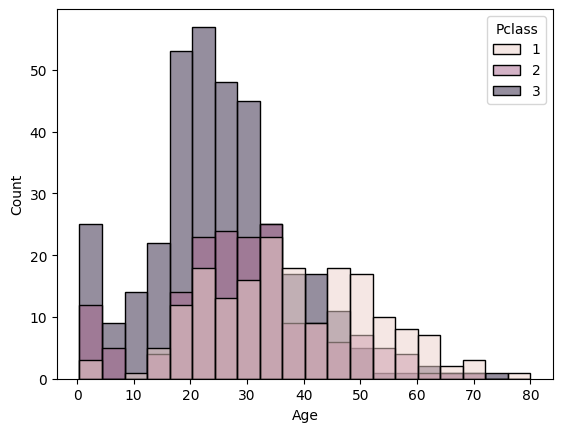

In [198]:
sns.histplot(data=train, x='Age', hue='Pclass')

In [199]:
age_1, age_2, age_3 = train.groupby(['Pclass'])['Age'].mean()
age_1

38.10554347826087

In [200]:
train[train['Pclass'] == 1] = train[train['Pclass'] == 1].fillna(age_1)
train[train['Pclass'] == 2] = train[train['Pclass'] == 2].fillna(age_2)
train[train['Pclass'] == 3] = train[train['Pclass'] == 3].fillna(age_3)

In [201]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

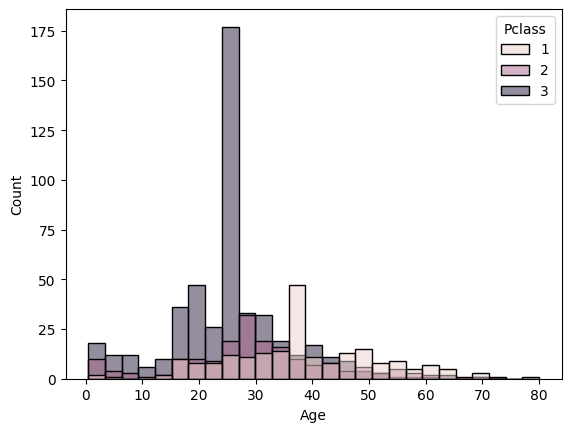

In [202]:
sns.histplot(data=train, x='Age', hue='Pclass')

### Test

In [203]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [204]:
test[test['Fare'].isna()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S

In [206]:
test[test['Pclass'] == 3]['Fare'].mean()

np.float64(12.459677880184334)

In [219]:
test['Fare'] = test['Fare'].fillna(test[test['Pclass'] == 3]['Fare'].mean())

In [220]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [221]:
test = test.drop('Cabin', axis=1)

In [222]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [223]:
age_1, age_2, age_3 = test.groupby(['Pclass'])['Age'].mean()
age_1

40.91836734693877

In [224]:
test[test['Pclass'] == 1] = test[test['Pclass'] == 1].fillna(age_1)
test[test['Pclass'] == 2] = test[test['Pclass'] == 2].fillna(age_2)
test[test['Pclass'] == 3] = test[test['Pclass'] == 3].fillna(age_3)

In [225]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature Engineering

In [369]:
train['IsAlone'] = ((train['SibSp'] == 0) & (train['Parch'] == 0)).astype(int)

In [370]:
test['IsAlone'] = ((test['SibSp'] == 0) & (test['Parch'] == 0)).astype(int)

In [374]:
regex = r'\b(Mr|Mrs|Miss)\b'

train['Name'] = train['Name'].str.extract(regex)
test['Name'] = test['Name'].str.extract(regex)

In [375]:
train['Name'] = train.apply(lambda row: 'Mr' if pd.isna(row['Name']) and row['Sex'] == 'male' else ('Miss' if pd.isna(row['Name']) and row['Sex'] == 'female' else row['Name']), axis=1)

In [ ]:
test['Name'] = test.apply(lambda row: 'Mr' if pd.isna(row['Name']) and row['Sex'] == 'male' else ('Miss' if pd.isna(row['Name']) and row['Sex'] == 'female' else row['Name']), axis=1)

## Preprocessing

In [382]:
features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'IsAlone']

X = pd.get_dummies(train[features], drop_first=True)
y = train['Survived']

X_main_test = pd.get_dummies(test[features], drop_first=True)
y_main_test = test_gender['Survived'].to_numpy()

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [385]:
from sklearn.preprocessing import StandardScaler

In [386]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_main_test = scaler.transform(X_main_test)

## Machine Learning

In [387]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV

In [388]:
def model_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    print(classification_report(y_test, y_pred))
    print(model.score(X_test, y_test))

In [389]:
def get_submission(model, X):
    y = model.predict(X)
    
    submission=pd.read_csv('gender_submission.csv')
    submission=pd.DataFrame({"PassengerId": submission["PassengerId"],"Survived":y})
    submission.to_csv('submission.csv',index=False)

### Logistic Regression

In [268]:
from sklearn.linear_model import LogisticRegression

In [269]:
lr_model = LogisticRegression(penalty='elasticnet', solver='saga')

In [282]:
param_grid = {'C': range(1, 11), 'l1_ratio': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]}

In [283]:
lr_grid = GridSearchCV(lr_model, param_grid)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.71      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178

0.7921348314606742


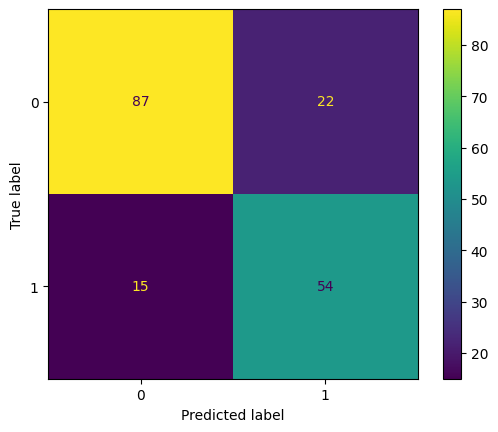

In [284]:
model_train_test(lr_grid, scaled_X_train, y_train, scaled_X_test, y_test)

In [285]:
get_submission(lr_grid, scaled_X_main_test)

### KNN Model

In [255]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
knn_model = KNeighborsClassifier()

In [286]:
param_grid = {'n_neighbors': range(1, 11)}

In [287]:
knn_grid = GridSearchCV(knn_model, param_grid)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.73      0.70      0.71        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

0.7808988764044944


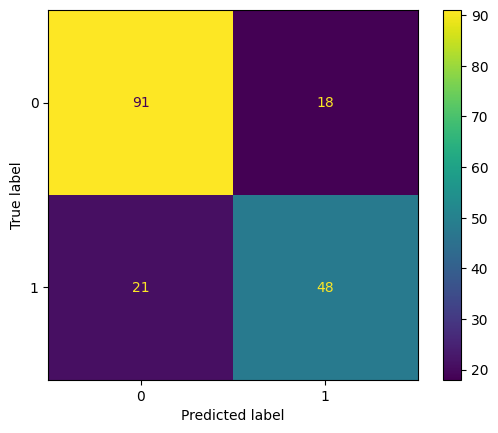

In [288]:
model_train_test(knn_grid, scaled_X_train, y_train, scaled_X_test, y_test)

In [289]:
get_submission(knn_grid, scaled_X_main_test)

### SVM

In [290]:
from sklearn.svm import SVC

In [310]:
svc_model = SVC(class_weight='balanced', gamma='auto')

In [315]:
param_grid = {'C': range(5, 26), 'kernel':['linear', 'rbf', 'poly']}

In [316]:
svc_grid = GridSearchCV(svc_model, param_grid)

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       109
           1       0.66      0.80      0.72        69

    accuracy                           0.76       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.76      0.77       178

0.7640449438202247


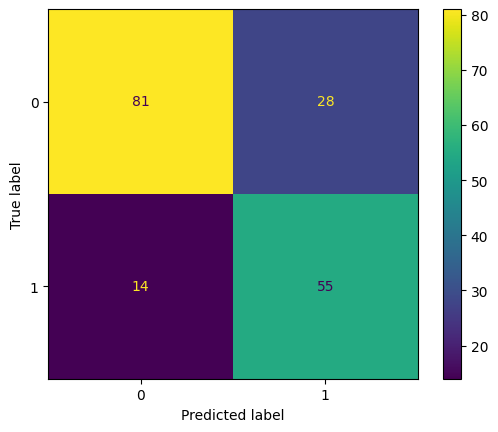

In [317]:
model_train_test(svc_grid, scaled_X_train, y_train, scaled_X_test, y_test)

In [319]:
get_submission(svc_grid, scaled_X_main_test)

### Random Forests

In [390]:
from sklearn.ensemble import RandomForestClassifier

In [391]:
rf_model = RandomForestClassifier()

In [392]:
param_grid = {'n_estimators': range(64, 129, 5), 'max_depth': range(1, 11), 'criterion': ['gini', 'entropy', 'log_loss']}

In [393]:
rf_grid = GridSearchCV(rf_model, param_grid)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.75      0.72      0.74        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178

0.797752808988764


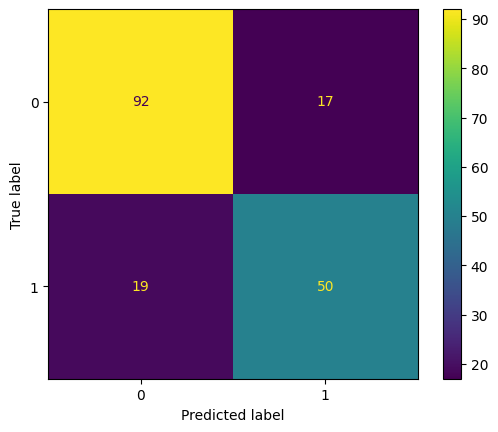

In [394]:
model_train_test(rf_grid, scaled_X_train, y_train, scaled_X_test, y_test)

In [395]:
get_submission(rf_grid, scaled_X_main_test)  # Лучшая модель

### Gradient Boosting

In [326]:
from sklearn.ensemble import GradientBoostingClassifier

In [327]:
gb_model = GradientBoostingClassifier()

In [331]:
param_grid = {'n_estimators': range(64, 129, 10), 'max_depth': range(1, 6)}

In [332]:
gb_grid = GridSearchCV(gb_model, param_grid)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

0.8202247191011236


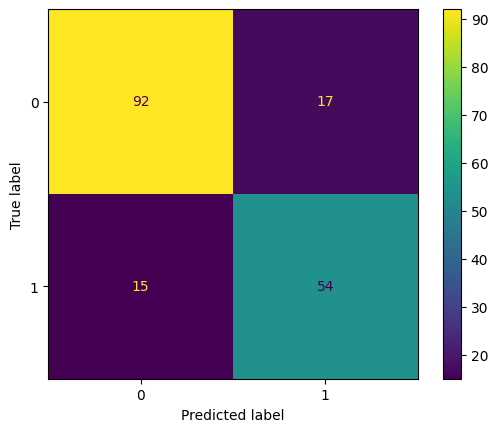

In [333]:
model_train_test(gb_grid, scaled_X_train, y_train, scaled_X_test, y_test)

In [334]:
get_submission(gb_grid, scaled_X_main_test)

### XGBoost

In [335]:
from xgboost import XGBClassifier

In [352]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.4, max_depth=5)

In [339]:
#param_grid = {'n_estimators': range(64, 129, 10), 'max_depth': range(1, 6)}

In [340]:
#xgb_grid = GridSearchCV(xgb_model, param_grid)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       109
           1       0.79      0.78      0.79        69

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178

0.8370786516853933


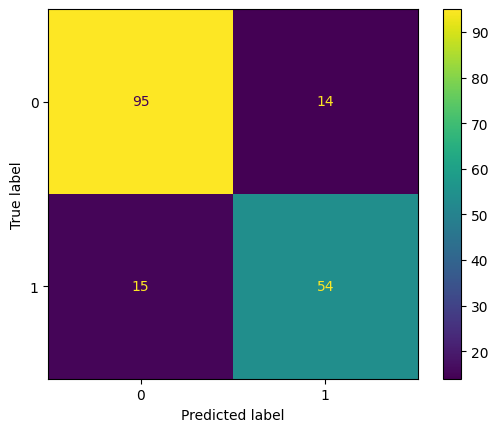

In [353]:
model_train_test(xgb_model, scaled_X_train, y_train, scaled_X_test, y_test)

In [358]:
get_submission(xgb_model, scaled_X_main_test)

### LightGBM

In [355]:
from lightgbm import LGBMClassifier

In [356]:
lgbm_model = LGBMClassifier()

In [360]:
param_grid = {'n_estimators': range(50, 151, 10), 'max_depth': range(1, 6), 'learning_rate': [0, 0.2, 0.4, 0.6, 0.8, 1], 'num_leaves': range(10, 51, 5)}

In [361]:
lgbm_grid = GridSearchCV(lgbm_model, param_grid)

s:\Data\Coding\Kaggle\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "s:\Data\Coding\Kaggle\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\egorn\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\egorn\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       109
           1       0.78      0.75      0.76        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178

0.8202247191011236


s:\Data\Coding\Kaggle\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
s:\Data\Coding\Kaggle\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
s:\Data\Coding\Kaggle\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
s:\Data\Coding\Kaggle\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2475 fits failed out of a total of 14850.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
------------------------------

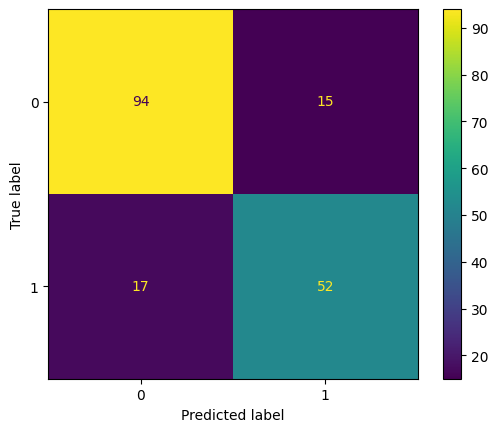

In [362]:
model_train_test(lgbm_grid, scaled_X_train, y_train, scaled_X_test, y_test)

In [363]:
get_submission(lgbm_grid, scaled_X_main_test)

s:\Data\Coding\Kaggle\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
